In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import pandas as pd
import glob

def plot_func(x, y, label, title, xlab, ylab):

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(x, y, label=label)
    
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(xlab, fontsize=30)
    ax.set_ylabel(ylab, fontsize=30)
    
    ax.legend(loc='best', fontsize=30)
    ax.grid(True)
    
    return fig, ax

def fft_func(y, f_s):
    
    freqs = fft.fftshift(fft.fftfreq(y.size, 1 / f_s))
    Y = fft.fftshift(fft.fft(y))
    
    return freqs, Y

def phase_func(Y):
    
    phases = np.angle(Y) * 180 / np.pi
    
    return phases

def get_phase_at_f(freqs, Y, f, threshold):

    Y2 = Y
    Y2[np.abs(Y) < threshold] = 0
    phases2 = np.angle(Y2) * 180 / np.pi
        
    p = np.angle(Y2[np.isin(freqs, f)], deg = True)
    return p, phases2

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


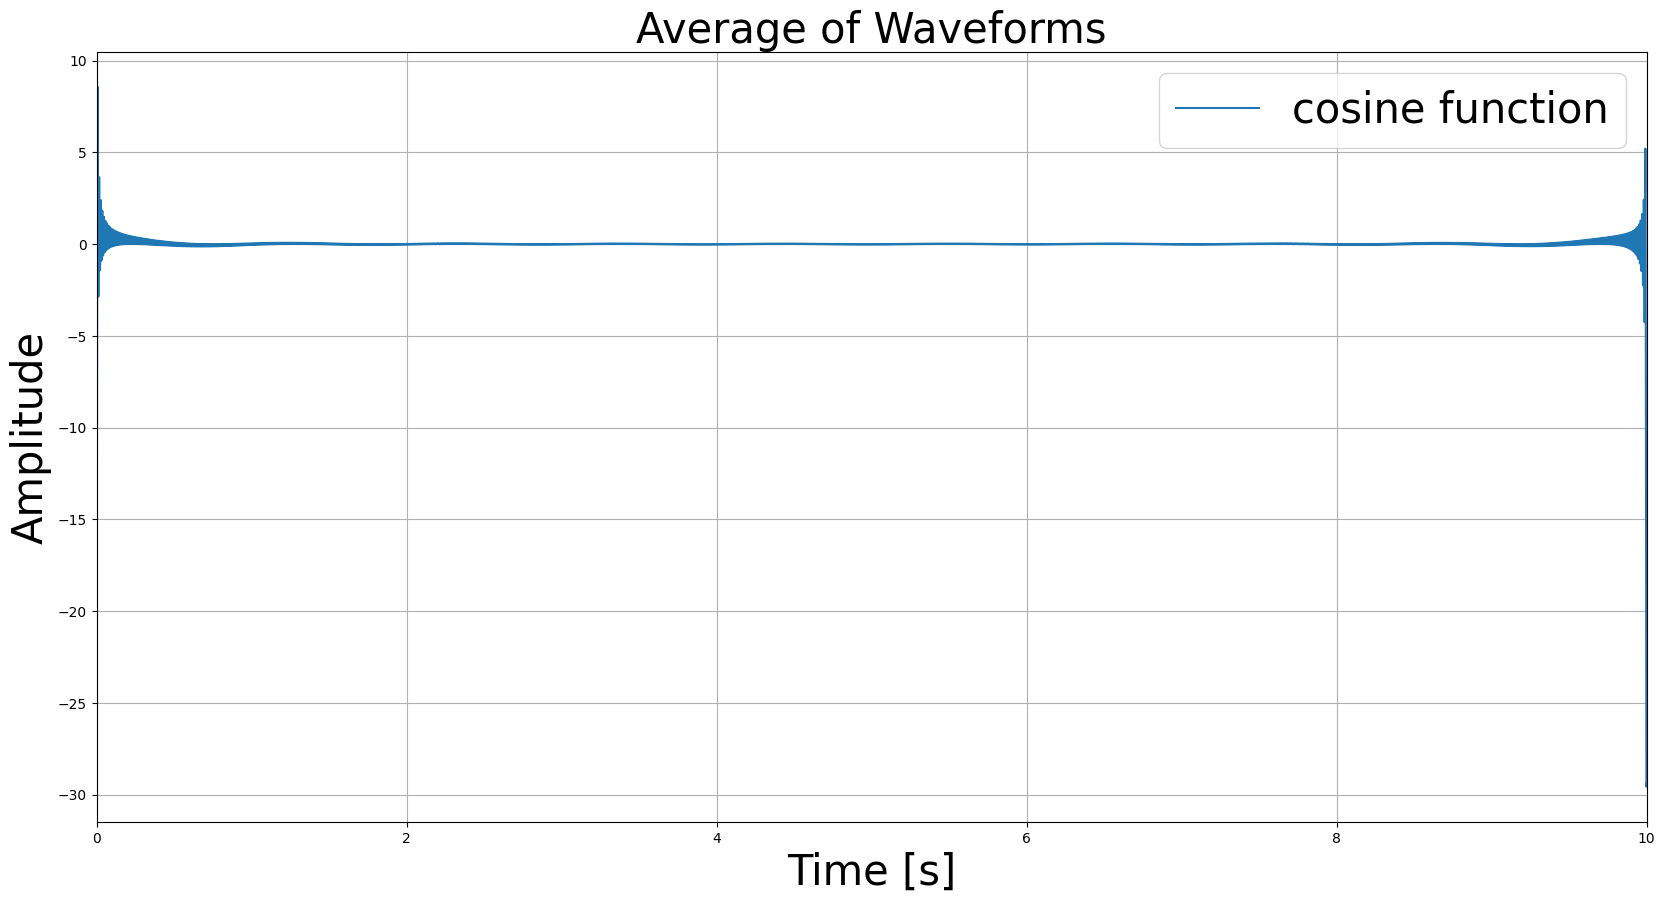

In [21]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(mint, maxt, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

#amplitudes1 = np.sin(5 * 2*np.pi * times + np.pi/2) 
#np.pi/2 is necessary for the fft bc it uses cos
#subtracting 2 things that are off by a phase


amplitude_list = []
amplitude = 0
f = np.arange(1, 100, 0.1)
ph = random_array = np.random.uniform(-180, 180, 1000)


for i in range(ph.size):
    for j in range(f.size):
        amplitude += np.cos(f[j] *2*np.pi *times + ph[i])
    amplitude_list.append(amplitude)
    amplitude = 0
number_wf = ph.size

amplitude_np_list = np.stack(amplitude_list, axis = 0)
amplitudes = np.sum(amplitude_np_list, axis = 0)

fig, ax = plot_func(times, amplitudes/number_wf, 'cosine function', 'Average of Waveforms', 'Time [s]', 'Amplitude')
plt.xlim(0,10)
plt.show()


# FT of mean

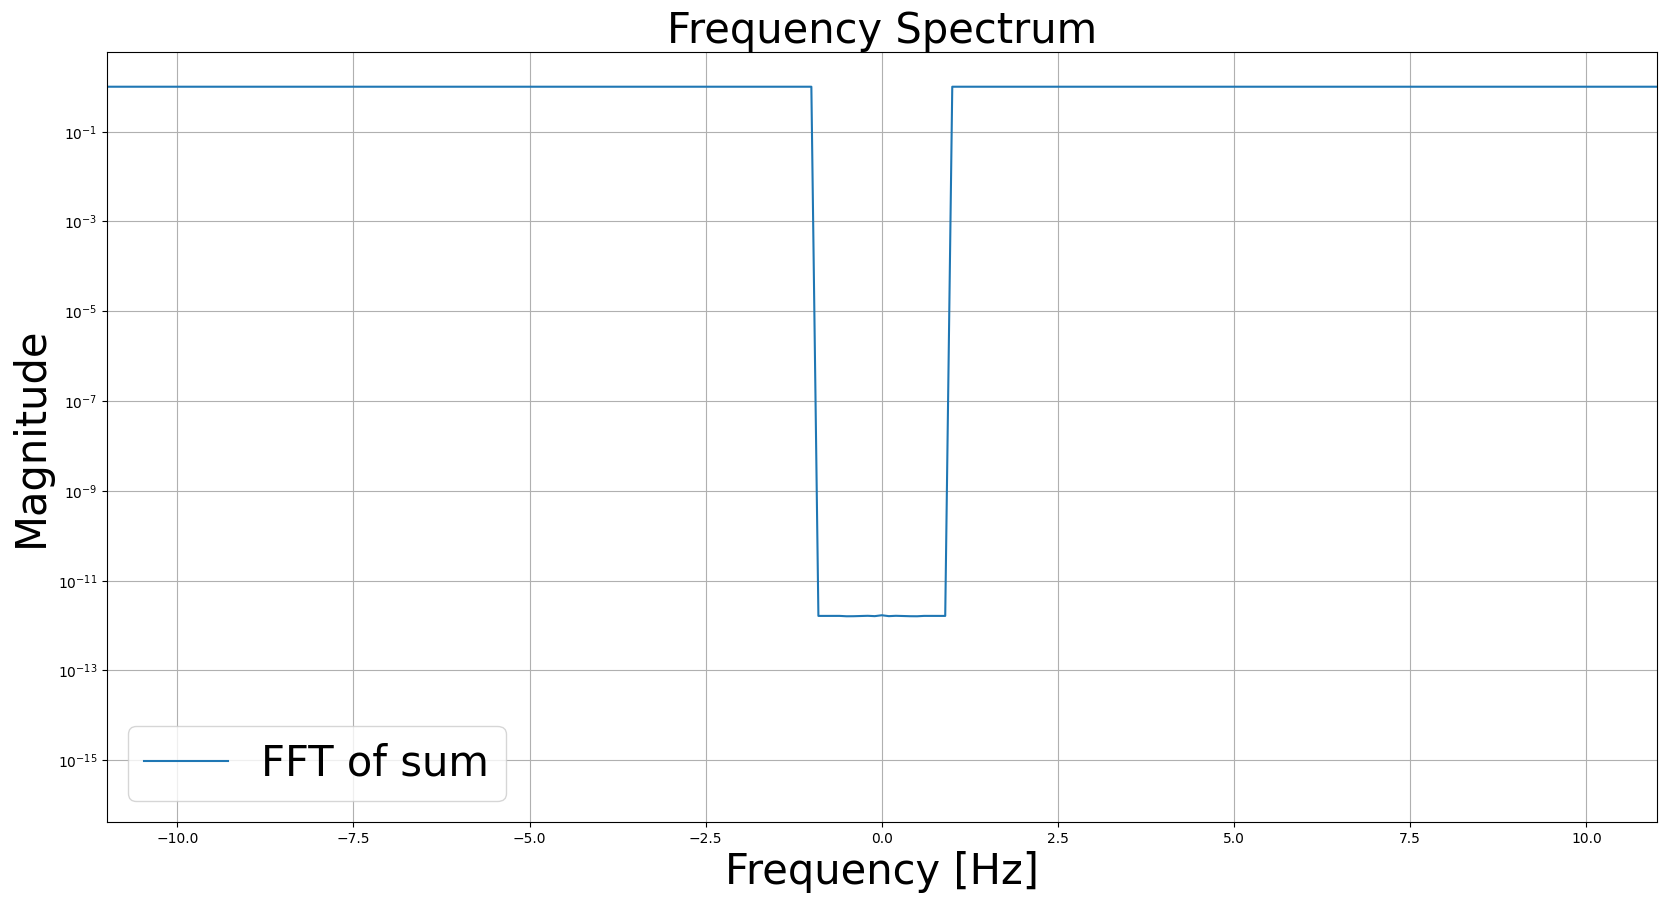

In [22]:
freqs_A, Y = fft_func(amplitudes/number_wf, f_s)

fig, ax = plot_func(freqs_A, np.abs(Y)/max(np.abs(Y)), 'FFT of sum', 'Frequency Spectrum', 'Frequency [Hz]', 'Magnitude')
plt.xlim(-11, 11)
plt.semilogy()
#plt.semilogy()

plt.show()

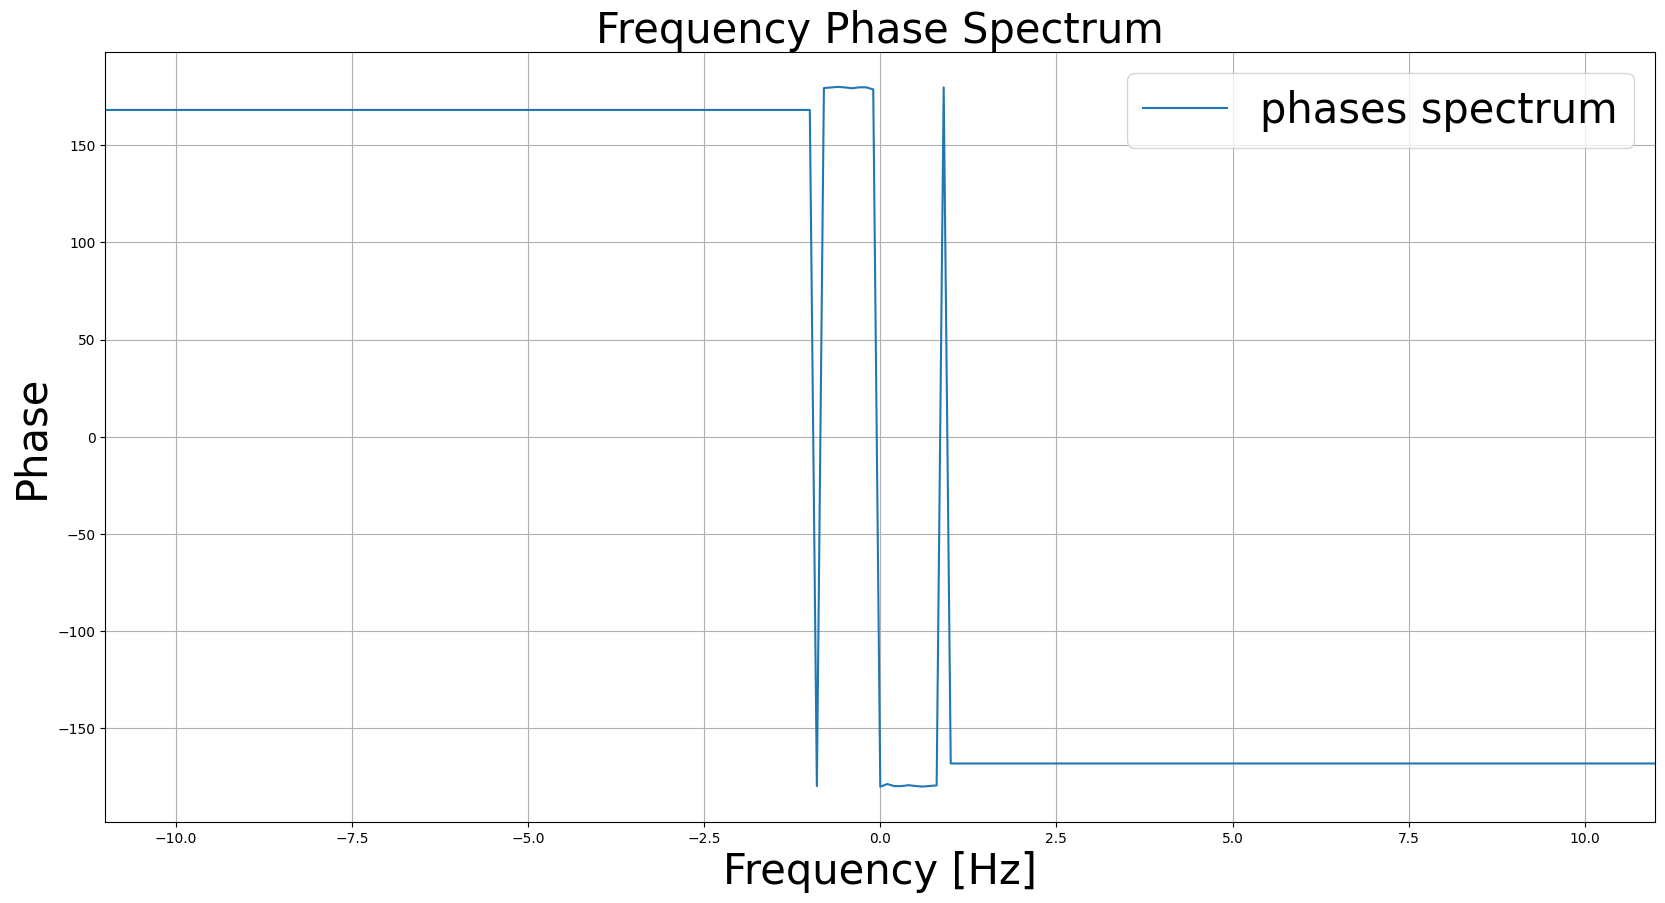

In [23]:
phases_A = phase_func(Y)

plot_func(freqs_A, phases_A, 'phases spectrum', 'Frequency Phase Spectrum', 'Frequency [Hz]', 'Phase')
plt.xlim(-11, 11)

plt.show()

[-11.2  11.2]
[ 168.05453719 -168.05453719]


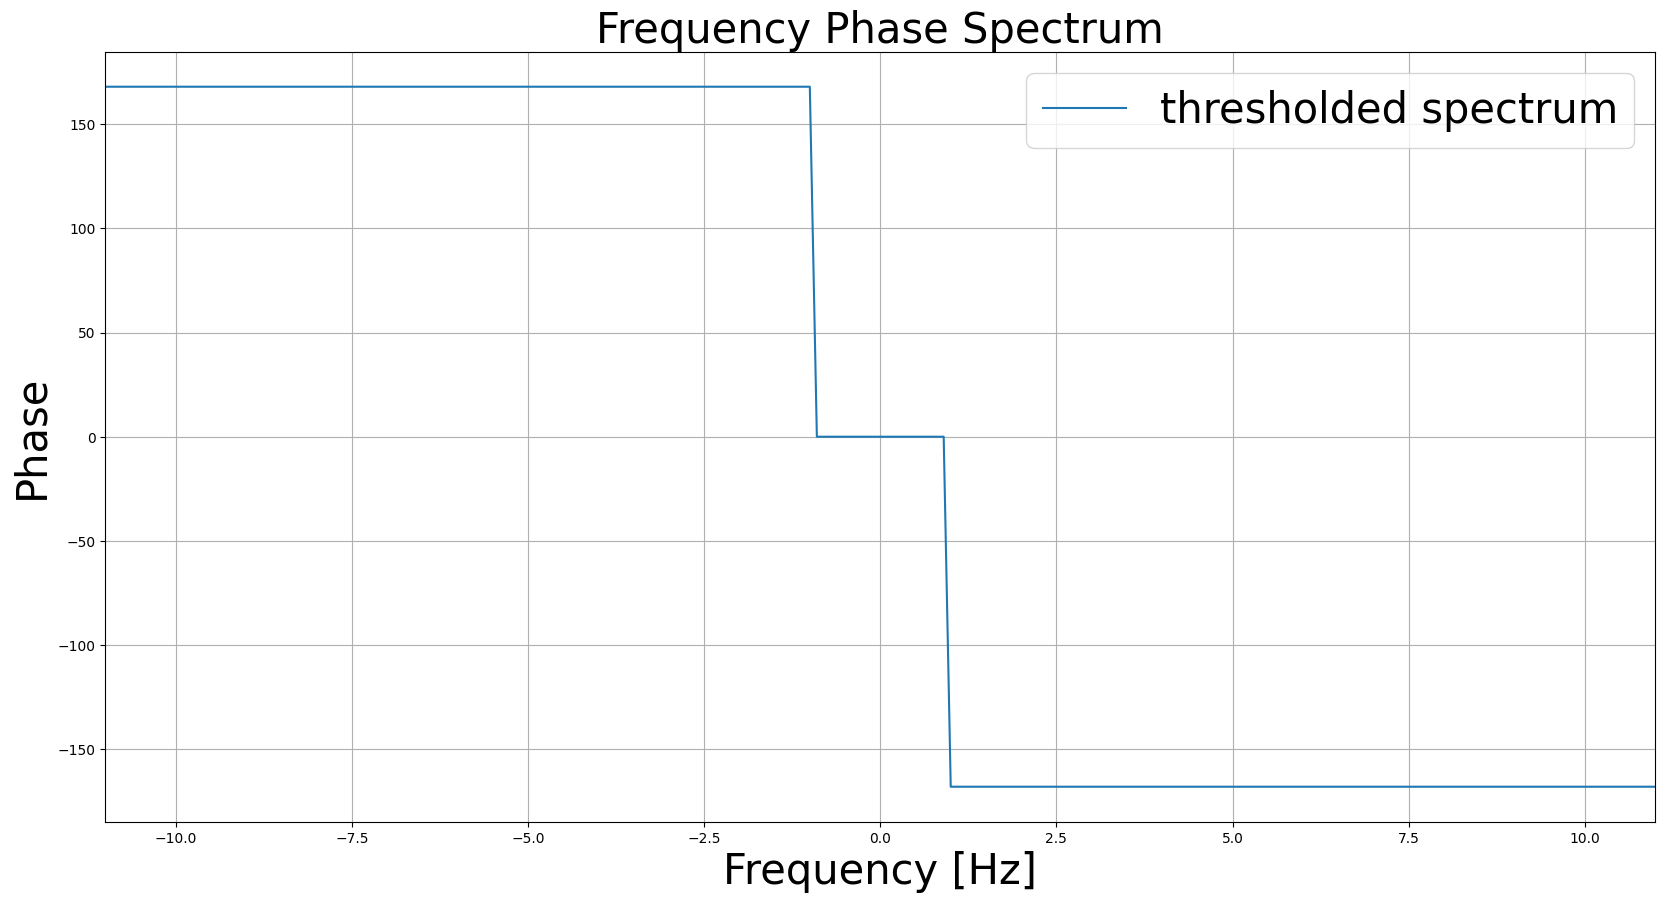

In [24]:
noise_freqs = freqs_A[np.abs(Y) == np.max(np.abs(Y))]
print(noise_freqs)
threshold = np.max(np.abs(Y))/3

p, phases2 = get_phase_at_f(freqs_A, Y, noise_freqs, threshold)
print(p)

plot_func(freqs_A, phases2, 'thresholded spectrum', 'Frequency Phase Spectrum', 'Frequency [Hz]', 'Phase')
plt.xlim(-11, 11)
plt.show()


# Mean of FT

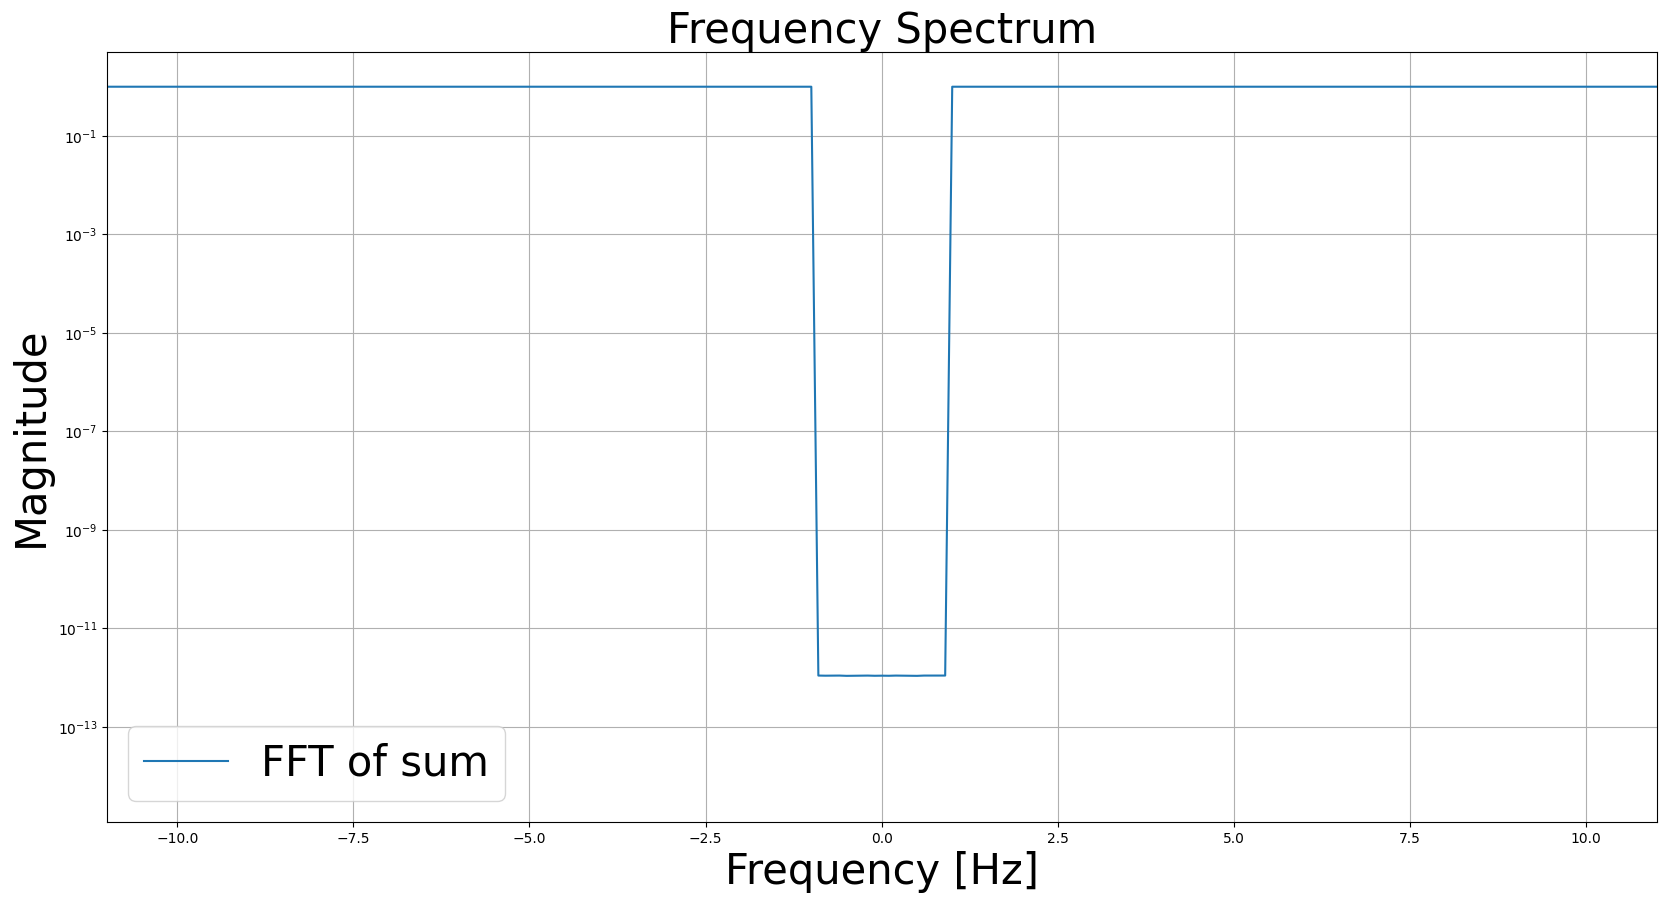

In [25]:
freqs_B = fft.fftshift(fft.fftfreq(amplitude_np_list[0].size, 1 / f_s))
Ys = fft.fftshift(fft.fft(amplitude_np_list, axis = 1))
avg_Y = np.mean(np.abs(Ys), axis = 0) 

plt.subplots(figsize=(20, 10))

#plt.plot(freqs_A, (np.abs(Y1)+np.abs(Y2))/(2*max((np.abs(Y1)+np.abs(Y2))/2)), label='sum of FFT', color = 'k', alpha = 0.3)

plt.plot(freqs_B, avg_Y/max(avg_Y), label='FFT of sum')


plt.title('Frequency Spectrum', fontsize=30)
plt.xlabel( 'Frequency [Hz]', fontsize=30)
plt.ylabel('Magnitude', fontsize=30)

plt.legend(loc='best', fontsize=30)
plt.grid(True)
plt.semilogy()

plt.xlim(-11, 11)

plt.show()

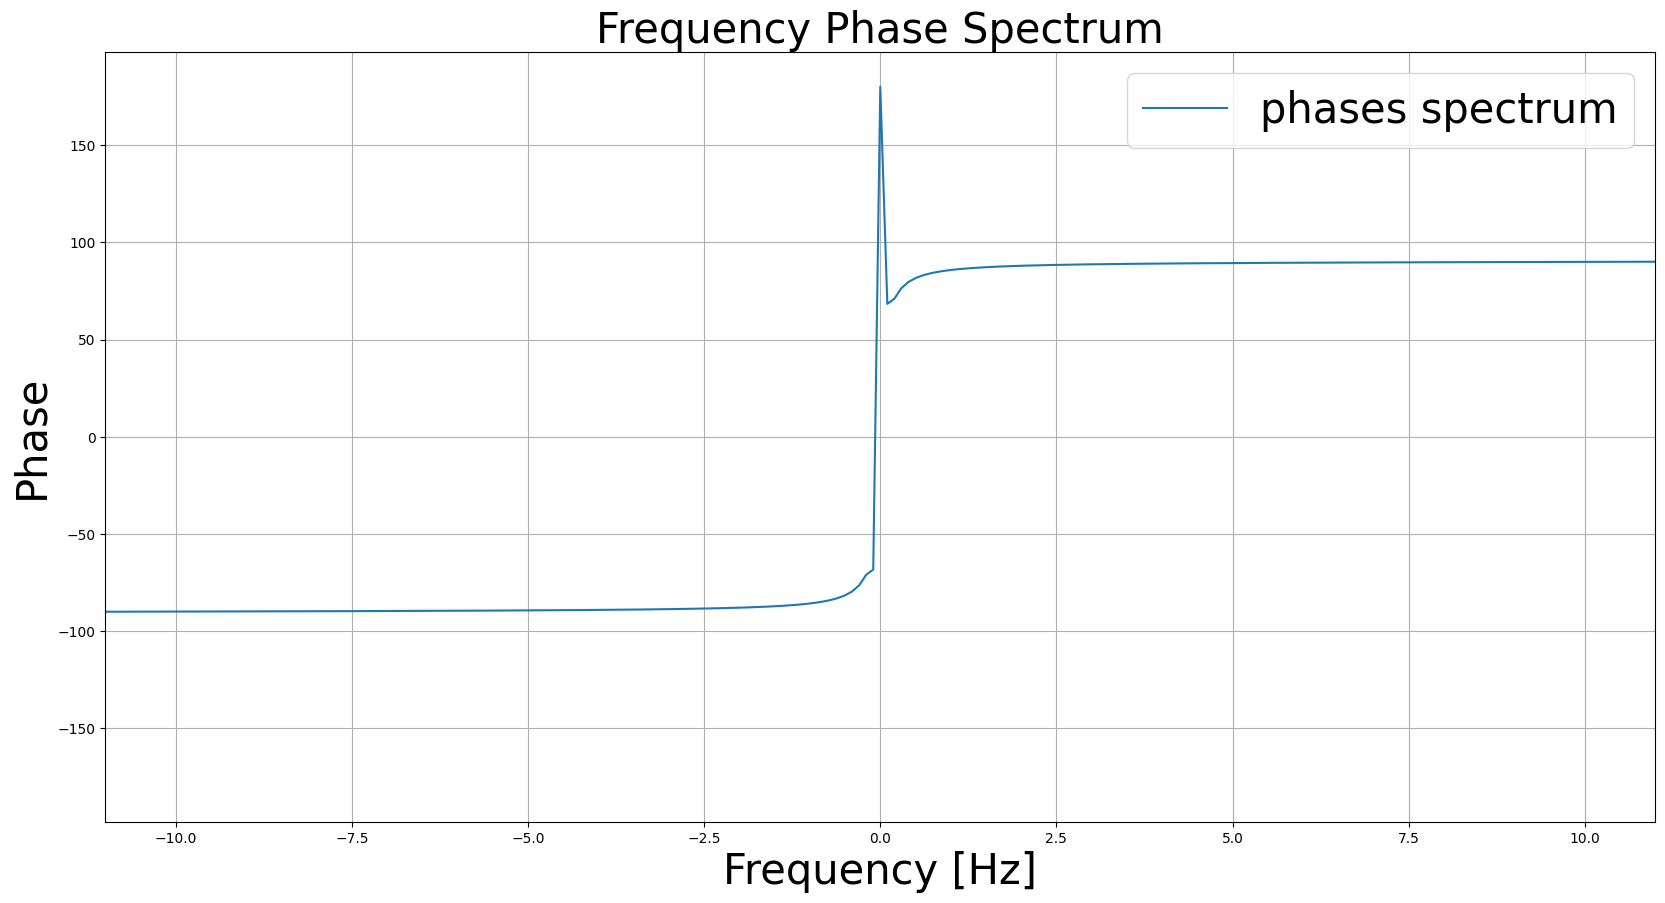

In [ ]:
phases_B = phase_func(np.mean(Ys, axis = 0) )

plot_func(freqs_B, phases_B, 'phases spectrum', 'Frequency Phase Spectrum', 'Frequency [Hz]', 'Phase')
plt.xlim(-11, 11)

plt.show()

# With my wf

In [ ]:
hour = '15.42'
day = '08082024'

In [ ]:
file_pattern = f"../../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_*.csv"
file_list_wf = glob.glob(file_pattern)

amplitudes_list_A = []

for i, file in enumerate(file_list_wf):
    df = pd.read_csv(file)
    if i == 0:
        print(df.iloc[:, 0])
        print(df.iloc[:, 1])
        times_A = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values
    amplitudes_A = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values
    if np.isnan(amplitudes_A).any():
            nan_indices = np.where(np.isnan(amplitudes_A))[0]
            print(f"Input data contains NaN values in {nan_indices} at {i} file.")
            amplitudes_A[nan_indices] = 0
 
    amplitudes_list_A.append(amplitudes_A)
    
#print(amplitudes_list)

all_amplitudes_A = np.stack(amplitudes_list_A, axis = 0)
print(all_amplitudes_A)

0               (us)
1         0.00000000
2         0.00080000
3         0.00160000
4         0.00240000
            ...     
62500    49.99920067
62501    50.00000067
62502    50.00080067
62503    50.00160067
62504    50.00240067
Name: Time, Length: 62505, dtype: object
0               (mV)
1        -1.96850400
2        -1.57480300
3        -1.18110200
4        -0.78740150
            ...     
62500     0.00000000
62501     0.39370070
62502    -0.39370070
62503    -1.18110200
62504    -1.18110200
Name: Channel D, Length: 62505, dtype: object
[[-1.968504  -1.574803  -1.181102  ... -0.3937007 -1.181102  -1.181102 ]
 [ 1.574803   0.7874015  0.        ... -0.3937007 -2.755905  -4.724409 ]
 [-0.3937007 -0.3937007  0.3937007 ... -0.7874015 -2.362205  -3.149606 ]
 ...
 [-3.149606  -2.755905  -1.181102  ...  3.149606   3.149606   2.755905 ]
 [ 1.574803   1.574803   1.574803  ...  3.149606   3.149606   1.574803 ]
 [ 1.181102   1.574803   2.755905  ...  2.755905   1.968504   2.362205 ]]


In [ ]:
N = len(times)
print(f"len(times): {N}")

len(times): 50000


In [ ]:
avg_wf =np.mean(all_amplitudes_A, axis=0)

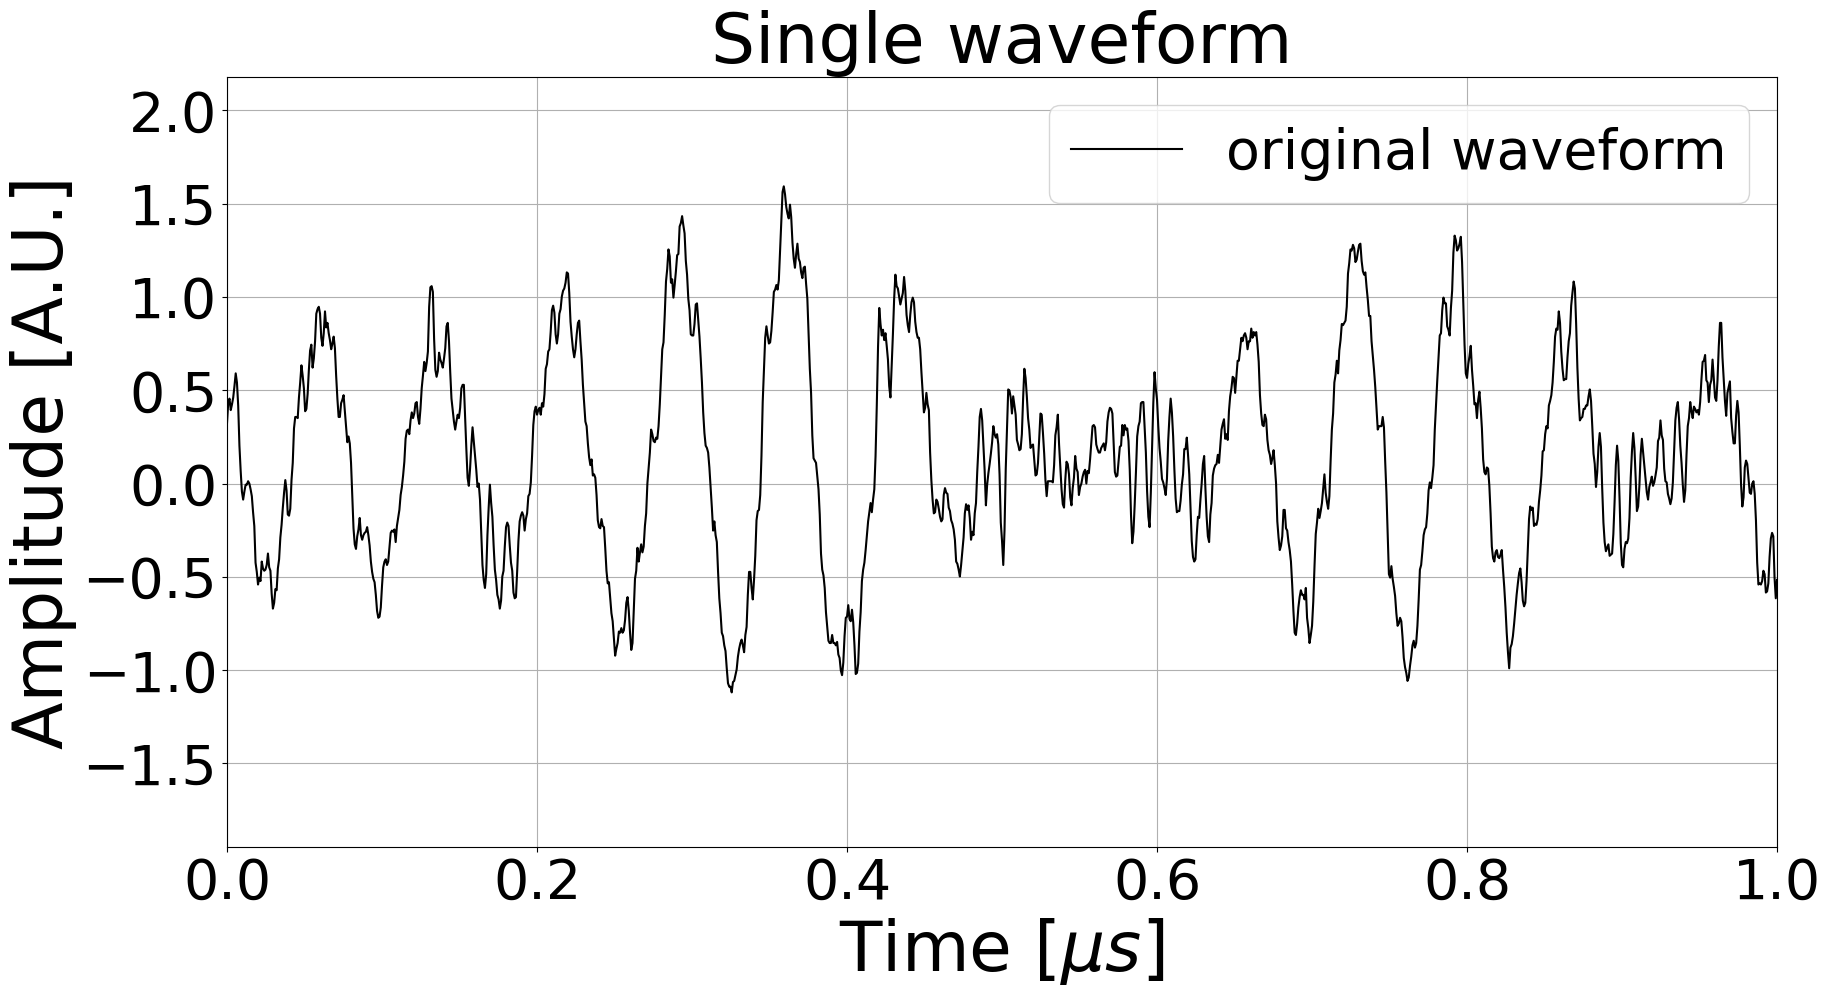

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(times_A, avg_wf, label = 'original waveform', color = 'k')

plt.title('Single waveform', fontsize = 50)
plt.xlabel(r'Time [$\mu s$]', fontsize = 50)
plt.xticks(fontsize = 40)
plt.ylabel('Amplitude [A.U.]', fontsize = 50)
plt.yticks(fontsize = 40)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 40)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/080824_15.42/Presentation/single_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

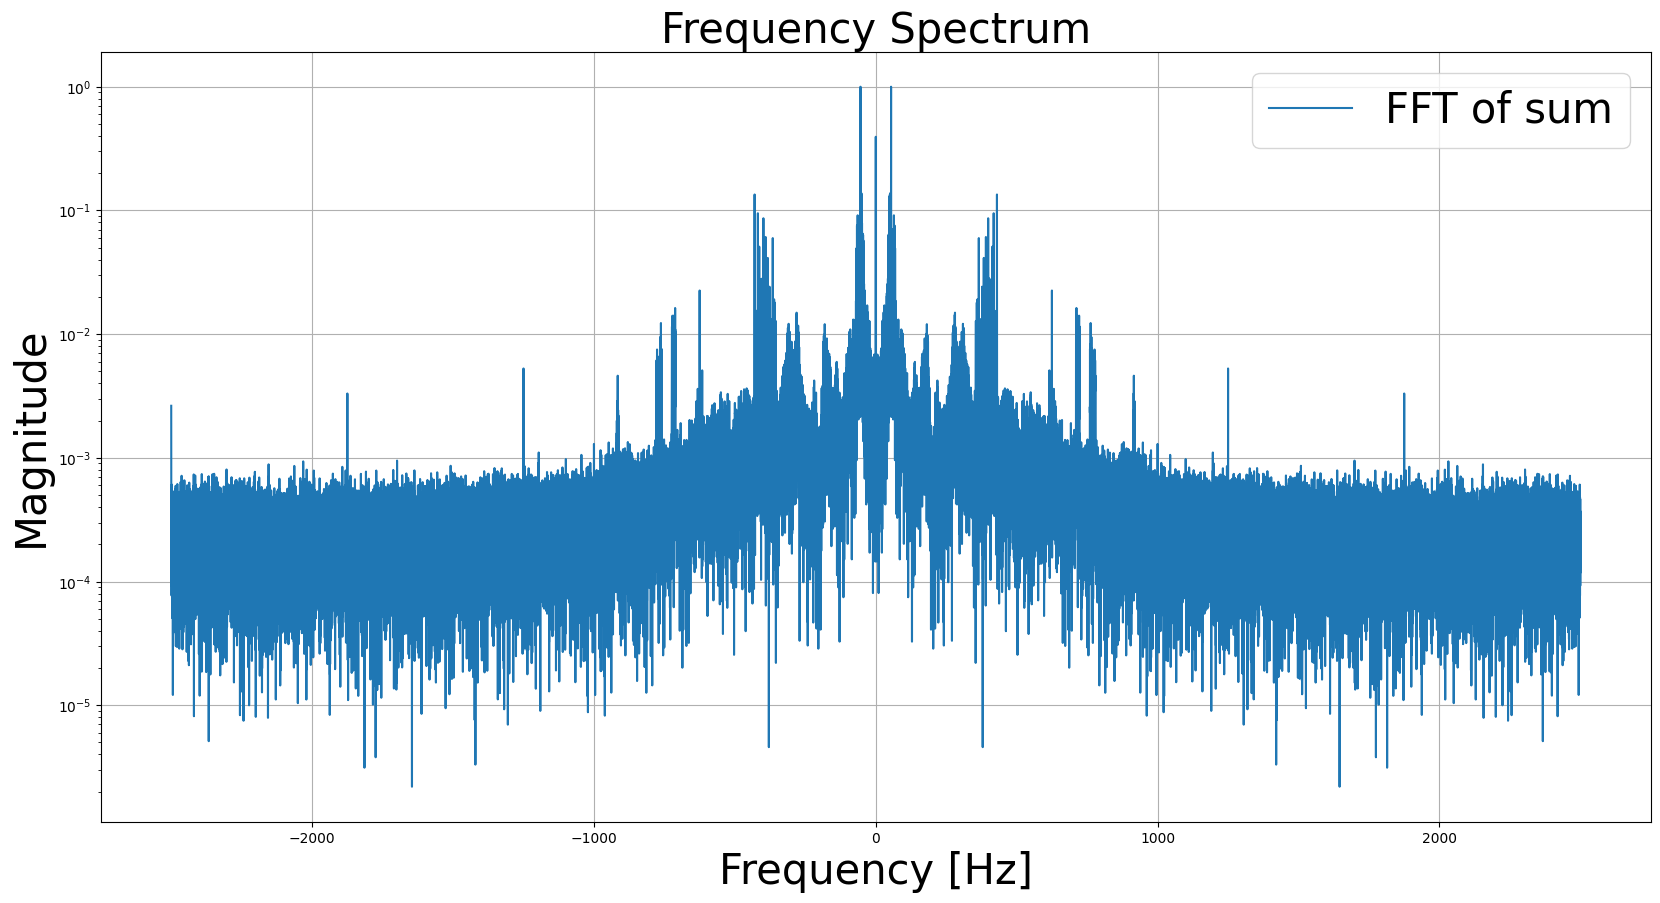

In [ ]:
freqs_A, Y = fft_func(avg_wf, f_s)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(freqs_A, np.abs(Y)/max(np.abs(Y)), label='FFT of sum')

ax.set_title('Frequency Spectrum', fontsize=30)
ax.set_xlabel( 'Frequency [Hz]', fontsize=30)
ax.set_ylabel('Magnitude', fontsize=30)

ax.legend(loc='best', fontsize=30)
ax.grid(True)

ax.semilogy()
plt.show()

In [ ]:
Ys_A_list = []

print(all_amplitudes_A.shape[0])
for i in range(all_amplitudes_A.shape[0]):
    freqs, Y_A = fft_func(all_amplitudes_A[i, :], f_s)
    Ys_A_list.append(Y_A)

Ys_A = np.stack(Ys_A_list, axis = 0)
avg_fft_A = np.mean(np.abs(Ys_A), axis = 0)

64


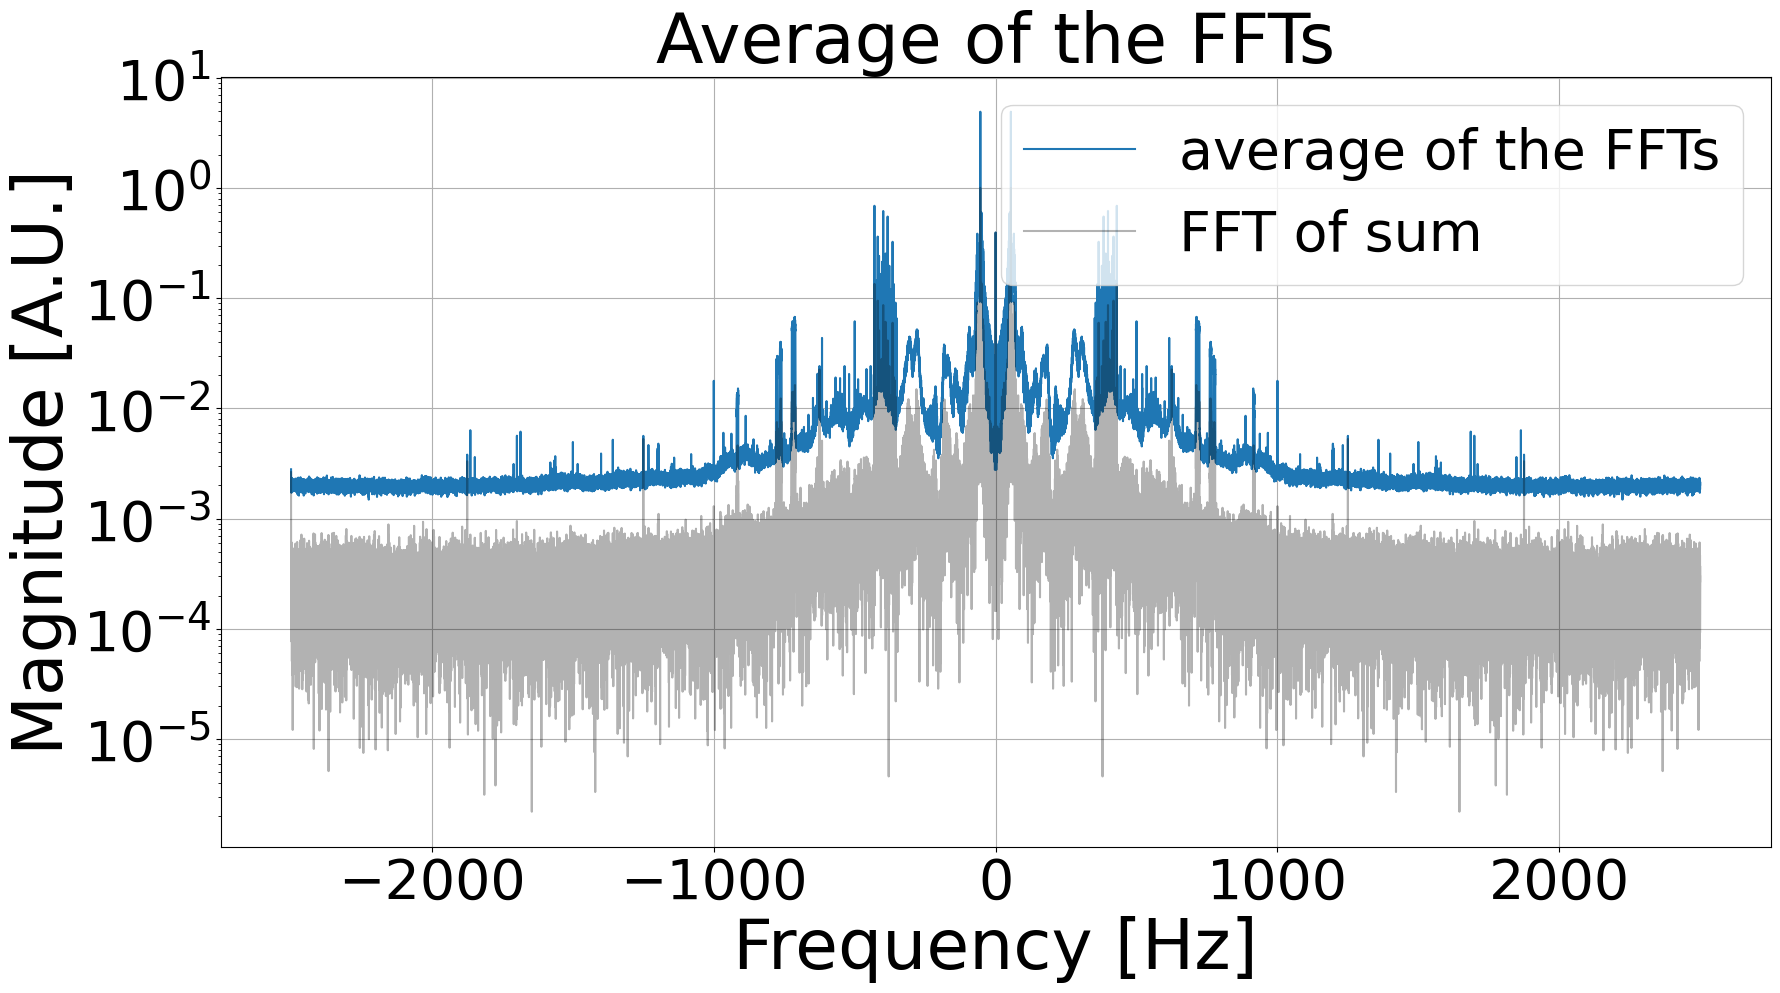

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(freqs_A, avg_fft_A/max(np.abs(Y)), label = 'average of the FFTs')

plt.plot(freqs_A, np.abs(Y)/max(np.abs(Y)), label='FFT of sum', color = 'k', alpha = 0.3)


plt.title('Average of the FFTs', fontsize = 50)
plt.xlabel(r'Frequency [Hz]', fontsize = 50)
plt.xticks(fontsize = 40)
plt.ylabel('Magnitude [A.U.]', fontsize = 50)
plt.yticks(fontsize = 40)
plt.semilogy()
plt.legend(loc = 'best', fontsize = 40)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/080824_15.42/Presentation/single_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()